# Завдання

- Отримати базові навички роботи в оточенні Google Colab.
- Розробити граф-дорогу, на основі якої буде виконано подальші
лабораторні роботи.

# Виконання

Імортування необхідних бібліотек:

- typing, copy та random необхідні для роботи графа
- networkx та matplotlib для відображення самого графа

In [239]:
from typing import List
from random import choice
from copy import deepcopy

import networkx as nx
import matplotlib.pyplot as plt

## Структура графу

Розмір графу - **n * n**

Кожна вершина має зв'язки із:

- вершиною, різниця індексів яких по модулю = **1**(крім _крайніх вершин_)
- вершиною, різниця індексів яких по модулю = **n**

Зв'язки представлені у вигляді масиву масивів, де елемент масиву містить **масив індексів вершин**, які приєднані до **індексу цього елементу**.

Видалення ребер виконується випадково, але із перевіркою на **зв'язність графу**.

![title](https://raw.githubusercontent.com/mezgoodle/images/master/image_2022-09-26_16-17-06.png)

In [240]:
class Graph:
    def __init__(self, n: int = 5):
        self.double_n = n * n
        self.n = n
        self.adjList: List[list] = [[] for _ in range(self.double_n)]
        self.edges_n = 0
        self._create_edges()

    def _create_edges(self): 
        for src in range(self.double_n):
            for dest in range(self.double_n):
                if abs(dest - src) == self.n:
                    self.adjList[src].append(dest)
                    self.edges_n += 1
                if abs(dest - src) == 1:
                    if (src % self.n == 0 and (dest + 1) % self.n == 0) or (dest % self.n == 0 and (src + 1) % self.n == 0):
                        continue
                    self.adjList[src].append(dest)
                    self.edges_n += 1
    
    def get_adjList(self):
        return {point: tuple(connections) for point, connections in enumerate(self.adjList)}

    def delete_edges(self, delete_n: int):
        if delete_n > self.edges_n / 2 + 1 - self.double_n:
            raise Exception(f'Delete number must be less or equal than {int(self.edges_n / 2 + 1 - self.double_n)}')
        for _ in range(delete_n):
            edges = []
            while True:
                temp_list = deepcopy(self.adjList)
                adjList_copy = deepcopy(self.adjList)
                point = choice(range(len(temp_list)))
                connected_point = choice(temp_list[point])
                if [point, connected_point] in edges:
                  continue
                edges.append([point, connected_point])
                temp_list[point].remove(connected_point)
                temp_list[connected_point].remove(point)
                self.adjList = temp_list
                if self.isStronglyConnected():
                    print(point, connected_point)
                    break
                self.adjList = adjList_copy
    
    def _DFS(self, v, visited):
        visited[v] = True
        for u in self.adjList[v]:
            if not visited[u]:
                self._DFS(u, visited)

    def isStronglyConnected(self):
        for i in range(self.double_n):
            visited = [False] * self.double_n
            self._DFS(i, visited)
            for b in visited:
                if not b:
                    return False
    
        return True
    
    def draw(self):
      G=nx.Graph()
      positions = {}
      counter = 0
      for i in range(n):
        for j in range(n):
          G.add_node(counter)
          positions[counter] = (i, j)
          counter += 1
      for point, connections in enumerate(self.adjList):
        for connection in connections:
          G.add_edge(point, connection)
      nx.draw(G, pos=positions, with_labels=True, font_weight='bold')

## Ініціалізація графу

In [241]:
n = 4

In [242]:
graph = Graph(n)

Кількість ребер

In [243]:
graph.edges_n

48

Список зв'язків

In [244]:
graph.adjList

[[1, 4],
 [0, 2, 5],
 [1, 3, 6],
 [2, 7],
 [0, 5, 8],
 [1, 4, 6, 9],
 [2, 5, 7, 10],
 [3, 6, 11],
 [4, 9, 12],
 [5, 8, 10, 13],
 [6, 9, 11, 14],
 [7, 10, 15],
 [8, 13],
 [9, 12, 14],
 [10, 13, 15],
 [11, 14]]

Метод для перевірки на зв'язність

In [245]:
graph.isStronglyConnected()

True

## Відображення графу

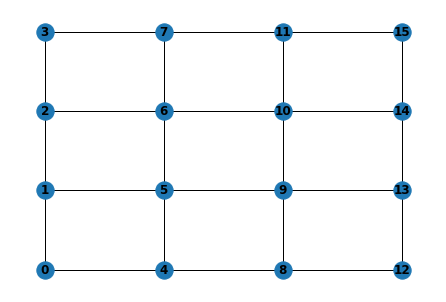

In [246]:
graph.draw()

## Видалення ребер

In [247]:
graph.delete_edges(6)

9 5
9 13
3 7
1 0
12 13
7 6


In [248]:
graph.adjList

[[4],
 [2, 5],
 [1, 3, 6],
 [2],
 [0, 5, 8],
 [1, 4, 6],
 [2, 5, 10],
 [11],
 [4, 9, 12],
 [8, 10],
 [6, 9, 11, 14],
 [7, 10, 15],
 [8],
 [14],
 [10, 13, 15],
 [11, 14]]

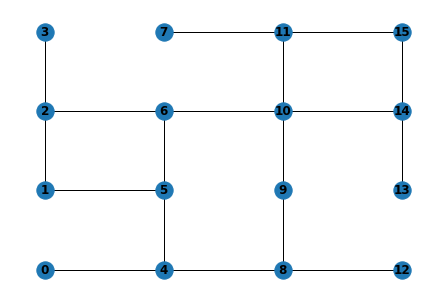

In [249]:
graph.draw() 